In [2]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC, SVR
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA, NMF

In [6]:
cancer = load_breast_cancer(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [10]:
scaler = MinMaxScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [14]:
param_grid = {'svm__C':np.logspace(-2, 3, 6), 'svm__gamma':np.logspace(-2, 2, 5)}

In [12]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())]).fit(X_train, y_train)
pipe.score(X_test, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

0.9440559440559441

In [15]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'svm__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [16]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=10.0, gamma=0.1))]),
 {'svm__C': 10.0, 'svm__gamma': 0.1},
 0.9859644322845418)

In [17]:
grid.score(X_test, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

0.951048951048951

In [19]:
pipe = make_pipeline(MinMaxScaler(), SVC())

In [21]:
param_grid = {'svc__C':np.logspace(-2, 3, 6), 'svc__gamma':np.logspace(-2, 2, 5)}

In [22]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [23]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC(C=10.0, gamma=0.1))]),
 {'svc__C': 10.0, 'svc__gamma': 0.1},
 0.9859644322845418)

In [24]:
grid.score(X_test, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

0.951048951048951

In [25]:
pipe.named_steps['svc']

SVC()

In [27]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C':np.logspace(-3, 2, 6)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [28]:
grid.best_estimator_, grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

(Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, max_iter=1000))]),
 {'logisticregression__C': 0.1},
 0.9789603283173735,
 0.958041958041958)

In [30]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.41174137, -0.3409764 , -0.39771262, -0.38687576, -0.12065212,
        -0.02739452, -0.37951134, -0.47154384, -0.04615307,  0.24877922,
        -0.3792984 , -0.02441086, -0.26276477, -0.29070688, -0.03491601,
         0.18403577,  0.02896315, -0.12201081,  0.17239782,  0.17559515,
        -0.52893854, -0.5598582 , -0.48604328, -0.458885  , -0.35711507,
        -0.16852769, -0.36564332, -0.52207435, -0.33360525, -0.1774952 ]])

In [31]:
boston = mglearn.datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

In [42]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso())
param_grid = {'polynomialfeatures__degree':[1, 2, 3], 'lasso__alpha':np.logspace(-3, 2, 6)}

In [43]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'polynomialfeatures__degree': [1, 2, 3]})

In [44]:
grid.best_estimator_, grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

(Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('polynomialfeatures', PolynomialFeatures()),
                 ('lasso', Lasso(alpha=0.01))]),
 {'lasso__alpha': 0.01, 'polynomialfeatures__degree': 2},
 0.7954273624838928,
 0.6870047407751636)

In [45]:
grid.best_estimator_.named_steps['lasso'].coef_

array([ 0.        , -0.        , -0.02066904,  0.27420488,  0.        ,
       -0.94664115,  3.34626896, -1.46490812, -1.53050477,  0.        ,
       -0.        , -0.43323649,  2.04041939, -3.34287698,  0.07481959,
        0.        ,  0.        ,  2.35804425, -0.78766964,  0.34264799,
       -0.17481369,  0.1060849 , -0.17791957, -0.        , -0.        ,
       -0.01821177,  0.43217589,  0.1781821 ,  0.        , -0.05968231,
       -0.        ,  0.009303  , -0.        , -0.24295858, -0.        ,
        0.92897173, -0.        ,  0.        , -0.32701847,  0.99964143,
       -0.        ,  1.99087159,  1.07514722,  0.5189834 ,  1.10783781,
        0.        ,  0.35552051, -0.7836494 ,  0.        , -0.91921759,
        0.08005128, -0.83418934, -0.9020322 ,  0.6879219 , -0.        ,
        0.24827822,  0.        , -0.076999  ,  2.4294565 , -0.89013546,
       -0.15846404,  0.39058392, -0.43317716,  0.80014732, -1.35558286,
       -0.        , -0.16218186,  0.23892502,  0.68462433,  0.33

In [46]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.001802,0.023421,0.135123,0.002002,0.026224,0.086278,0.001401,0.004804,0.047443,0.001801,0.002402,0.010209,0.001801,0.002402,0.005005,0.002002,0.002202,0.003803
std_fit_time,0.0004,0.001358,0.013172,0.0,0.003658,0.014132,0.00049,0.000749,0.004321,0.0004,0.00049,0.001328,0.0004,0.000491,0.0,0.000001,0.000401,0.000749
mean_score_time,0.000601,0.000801,0.001001,0.0006,0.000801,0.001001,0.001001,0.000601,0.001802,0.000801,0.0006,0.001201,0.000801,0.001001,0.001001,0.0008,0.000601,0.000801
std_score_time,0.000491,0.0004,0.0,0.00049,0.0004,0.000633,0.0,0.00049,0.001168,0.0004,0.00049,0.000401,0.0004,0.0,0.0,0.0004,0.00049,0.0004
param_lasso__alpha,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1.0,1.0,1.0,10.0,10.0,10.0,100.0,100.0,100.0
param_polynomialfeatures__degree,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3
params,"{'lasso__alpha': 0.001, 'polynomialfeatures__d...","{'lasso__alpha': 0.001, 'polynomialfeatures__d...","{'lasso__alpha': 0.001, 'polynomialfeatures__d...","{'lasso__alpha': 0.01, 'polynomialfeatures__de...","{'lasso__alpha': 0.01, 'polynomialfeatures__de...","{'lasso__alpha': 0.01, 'polynomialfeatures__de...","{'lasso__alpha': 0.1, 'polynomialfeatures__deg...","{'lasso__alpha': 0.1, 'polynomialfeatures__deg...","{'lasso__alpha': 0.1, 'polynomialfeatures__deg...","{'lasso__alpha': 1.0, 'polynomialfeatures__deg...","{'lasso__alpha': 1.0, 'polynomialfeatures__deg...","{'lasso__alpha': 1.0, 'polynomialfeatures__deg...","{'lasso__alpha': 10.0, 'polynomialfeatures__de...","{'lasso__alpha': 10.0, 'polynomialfeatures__de...","{'lasso__alpha': 10.0, 'polynomialfeatures__de...","{'lasso__alpha': 100.0, 'polynomialfeatures__d...","{'lasso__alpha': 100.0, 'polynomialfeatures__d...","{'lasso__alpha': 100.0, 'polynomialfeatures__d..."
split0_test_score,0.762783,0.815261,0.703193,0.764358,0.8487,0.919774,0.769175,0.871683,0.915104,0.724936,0.826495,0.838905,-0.005596,-0.000531,0.305344,-0.005596,-0.005596,-0.005596
split1_test_score,0.56957,0.623765,-0.985515,0.569288,0.589466,0.029301,0.557836,0.487458,-0.053861,0.582396,0.471229,0.17271,-0.0704,-0.070982,-0.648998,-0.0704,-0.0704,-0.0704
split2_test_score,0.779448,0.612242,-3.893532,0.780211,0.781181,0.540162,0.77581,0.890041,0.788799,0.722736,0.733044,0.415835,-0.029562,-0.029562,-1.95942,-0.029562,-0.029562,-0.029562


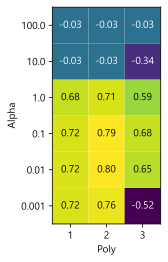

In [52]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(-1, 3), xlabel='Poly', ylabel='Alpha',
                      xticklabels=param_grid['polynomialfeatures__degree'], yticklabels=param_grid['lasso__alpha'])